# Parametric Modelling in ISAMBARD

In [91]:
import itertools
from pprint import pprint

import matplotlib.pyplot as plt
import nglview as nv
import numpy

%matplotlib inline

In [92]:
import isambard

In [93]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

## What is parametric modelling?

Parametric modelling is a method of creating models of biomolecular structure using a simple geometric description of the shape of the molecule. The molecular structure of the protein backbone enables it to adopt a huge number of conformations, but if we are modelling an amino acid sequence that is likely to be a parametrisable protein fold, we can reduce the complexity of modelling the sequence by using this simplified geometric description.

The most famous example of a parametrisable protein fold is the α-helical coiled coil, which accounts for ~5% of all protein-encoding DNA. This fold consists of two or more α-helices that wrap around each other to form a rope-like super-helical structure. Their structures range from very simple to highly complex, but at the core, all these structures can be described using a simple mathematical model. In the simplest case, only 3 geometric parameters are required to describe the position of all backbone atoms with near atomic precision! These parameters are pitch, radius and interface angle (also known as ϕCα) (Figure 1).

<figure>
    <img src="imgs/figure1.png" alt="Structure of α-helical coiled coil.">
    <figcaption>
        **Figure 1. Structure of α-helical coiled coils.** (A) Helical-wheel diagrams showing
        the projection of residues in the heptad repeat. (B) Helices in a coiled coil pack 
        closely together, forming knobs-into-holes interactions. (C) Coiled coils can be 
        described using three geometric parameters: interface angle (°), radius (Å), and 
        pitch (Å).
    </figcaption>
</figure>

You can get a better feeling for what these parameters represent by playing with [CCBuilder 2.0](http://coiledcoils.chm.bris.ac.uk/ccbuilder2/builder). CCBuilder is a interactive web application for modelling coiled coils, built on top of ISAMBARD. Under the hood it uses a lot of the functionality that we'll be learning about in this tutorial.

## Specifications

Parametric models in ISAMBARD are known as "specifications", a term borrowed from the field of architecture, where a specification is defined as "a detailed description of the design and materials used to make something". There are two types of specifications, one at the `Polymer` level and one at the `Assembly` level. `Polymer` specifications describe regions of regular backbone structure, like an α-helix. `Assembly` specifications describe how regions of secondary structure assemble together.

### The Coiled-Coil Specification

Let's start by building modelling some coiled coils. The very simplest way of creating a model is to build it using typical parameters for a particular oligomeric state of coiled coil.

In [94]:
import isambard.specifications as specs
import isambard.modelling as modelling


In [95]:
dimer = specs.CoiledCoil(2)

In [96]:
show_ball_and_stick(dimer)

NGLWidget()

In [97]:
dimer

<Assembly containing 2 Polypeptides>

Parametric models in ISAMBARD are AMPAL objects, just the same as any other structure that you might load in, so you can use the same tools that you encountered in the first tutorial to analyse their structure. They do contain some extra functionality though, such as the attributes and methods required to create the backbone model. Let's take a look at the values of the coiled coil parameters described above.

In [98]:
print("Radii: {}\nPitch values: {}\nInterface Angles: {}".format(
    dimer.major_radii, dimer.major_pitches, dimer.phi_c_alphas))

Radii: [5.07, 5.07]
Pitch values: [225.8, 225.8]
Interface Angles: [283.56, 283.56]


Here you can see that there are *n* values for each parameters, where *n* is equal to the oligomeric state. This is because the coiled coil parameters are defined relative to the super-helical axis.

Let's add some sidechains to this structure.

> **Note**<br/>Currently we use [SCWRL4](http://dunbrack.fccc.edu/scwrl4/) to add sidechains to structures, so you need to download a copy if you want to do this on your own computer. It requires a license but is free for academics.

In [99]:
dimer.basis_set_sequences

['EIAALKQEIAALKKENAALKWEIAALKQ', 'EIAALKQEIAALKKENAALKWEIAALKQ']

In [100]:
modelling.pack_side_chains_scwrl(dimer, dimer.basis_set_sequences)

<Assembly containing 2 Polypeptides>

In [101]:
show_ball_and_stick(dimer)

NGLWidget()

You can also create any <i>n</i>mer in the same way.

In [102]:
trimer = isambard.specifications.CoiledCoil(3)
tetramer = isambard.specifications.CoiledCoil(4)
pentamer = isambard.specifications.CoiledCoil(5)
hexamer = isambard.specifications.CoiledCoil(6)

In [103]:
pprint([dimer, trimer, tetramer, pentamer, hexamer])

[<Assembly containing 2 Polypeptides>,
 <Assembly containing 3 Polypeptides>,
 <Assembly containing 4 Polypeptides>,
 <Assembly containing 5 Polypeptides>,
 <Assembly containing 6 Polypeptides>]


Chances are though that you'll want to actually change the parameters used to create the model, it is parametric modelling after all!

### Building with Parameters

While we can directly modify the parameters on the models we created earlier, it's not a particularly convenient method of generating models, so we can use the `from_parameters` class method instead. Let's have a look at the documentation for this.

In [104]:
help(isambard.specifications.CoiledCoil.from_parameters)

Help on method from_parameters in module isambard.specifications.coiledcoil:

from_parameters(n, aa=28, major_radius=None, major_pitch=None, phi_c_alpha=26.42, minor_helix_type='alpha', auto_build=True) method of builtins.type instance
    Creates a `CoiledCoil` from defined super-helical parameters.
    
    Parameters
    ----------
    n : int
        Oligomeric state
    aa : int, optional
        Number of amino acids per minor helix.
    major_radius : float, optional
        Radius of super helix.
    major_pitch : float, optional
        Pitch of super helix.
    phi_c_alpha : float, optional
        Rotation of minor helices relative to the super-helical
        axis.
    minor_helix_type : float, optional
        Helix type of minor helices. Can be: 'alpha', 'pi', '3-10',
        'PPI', 'PP2', 'collagen'.
    auto_build : bool, optional
        If `True`, the model will be built as part of instantiation.



> ### Note
> Don't forget that you can see information on specific functions/classes in a number of ways:
> 1. Check the [API documentation](https://woolfson-group.github.io/isambard/api_reference.html)
> 1. Take a look at the [source code](https://github.com/woolfson-group/isambard/tree/master/isambard)
> 1. Shift+Tab inside the round brackets if you're using Jupyter Notebook
> 1. Use the Python `help` function i.e. `help(isambard.specifications.CoiledCoil.from_parameters)`

Here you can see all the parameters available; oligomeric state is the only required parameter, the others you could leave blank and it will function in pretty much the same as instantiating `CoiledCoil` directly. Let's make a dimer again but explicitly state the parameters.

In [105]:
dimer_exp_params = isambard.specifications.CoiledCoil.from_parameters(
    2, 28, 5, 225, 283) # i.e. 2 chains, 28 residues, radius 5Å, pitch 225Å, phi-c-alpha 283°

In [106]:
modelling.pack_side_chains_scwrl(dimer_exp_params,dimer.basis_set_sequences)

<Assembly containing 2 Polypeptides>

In [107]:
show_ball_and_stick(dimer_exp_params)

NGLWidget()

When modelling coiled coils, it can be useful to talk about the interface angle relative to the *a* position residue, and so you adjust its value based on the register of your sequence *i.e.* which heptad position is your first residue (Figure 1). Here's a little dictionary to convert your register to an interface angle at *a*.

In [108]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

Let's use this to make it easier to think about our sequence. The basis set dimer sequence starts at a *g* position, and usually the *a* position residues sit at around 26° (see Figure 1C).

In [109]:
dimer_with_reg = isambard.specifications.CoiledCoil.from_parameters(2, 28, 4.8, 160, REGISTER_ADJUST['g']+26)

In [110]:
modelling.pack_side_chains_scwrl(dimer_with_reg,dimer.basis_set_sequences)

<Assembly containing 2 Polypeptides>

In [111]:
show_ball_and_stick(dimer_with_reg)

NGLWidget()

If we change the register of our sequence we just need to update the adjust value.

In [112]:
f_dimer_sequences = [
    'QEIAALKKENAALKWEIAALKQEIAALK',
    'QEIAALKKENAALKWEIAALKQEIAALK'
#    fgabcdefgabcdefgabcdefgabcde
]

In [113]:
f_dimer = isambard.specifications.CoiledCoil.from_parameters(2, 28, 4.8, 160, REGISTER_ADJUST['f']+26)

In [114]:
modelling.pack_side_chains_scwrl(f_dimer, f_dimer_sequences)

<Assembly containing 2 Polypeptides>

In [115]:
show_ball_and_stick(f_dimer)

NGLWidget()

As you can see, the hydrophobic core is still buried.

> ### Problem
> Try changing the register without updating the sequence. What happens?

## Parametric Power! (and associated responsibility)

The only restriction on the conformations that you can model in ISAMBARD is the underlying geometric description in the specification, which means that you can build any backbone structure that is geometrically possible. This is very powerful as you can model protein structures that have not been observed in nature, and use the models as the basis for design. Let's make a dimer with some weird parameters.

In [116]:
weird_dimer = isambard.specifications.CoiledCoil.from_parameters(2, 60, 10, 80, 180)

In [117]:
show_ball_and_stick(weird_dimer)

NGLWidget()

In [118]:
weird_trimer = isambard.specifications.CoiledCoil.from_parameters(3, 20, 6, 1000, 278)

In [119]:
show_ball_and_stick(weird_trimer)

NGLWidget()

These models have extreme values for parameters and so sequences are highly unlikely to fold into these structures. Rather than restricting the parameters that are available to the user (who am I to judge what you build in your own time!), we provide a range of metrics to evaluate the models you produce.

## Evaluating Models

### Geometric Evaluation

The `analyse_protein` module provides a range of tools to evaluating the backbone geometry of your model. One of the most useful metrics we can use is the residues per turn (RPT) of the  α-helices in the model. At extreme parameter values, RPT can move away out of the range of values observed in α-helices of known protein structures (Figure 2), which indicates that there is backbone strain in the model.

<figure>
    <img src="imgs/figure2.png" alt="Values of residues per turn observed in known structures."
         height="60%" width="60%">
    <figcaption>
        **Figure 2. Values of residues per turn observed in known structures**. Grey bars: Values of residues per 
        turn from helices in known structures. Mean = 3.65 (SD = 0.07). White bars: Values of RPT found in coiled-
        coil crystal structures. Mean = 3.62 (SD = 0.07)
    </figcaption>
</figure>

As you can see, this distribution is very tight, so if your number of residues per turn moves too far away from the mean, it's probably indicating that the model isn't very good. Let measure the RPT values on our models.

In [120]:
import isambard.evaluation
dimer_rpt_values = [isambard.ampal.protein.residues_per_turn(p) for p in dimer]

In [121]:
pprint(dimer_rpt_values)

[[3.6506316833392716,
  3.6486507117335076,
  3.5745460313287833,
  3.5603800498260845,
  3.5721808533111257,
  3.5913143193800585,
  3.5908705570086203,
  3.5719395039706803,
  3.580871440033611,
  3.595708263547801,
  3.5803242207383303,
  3.572180853311127,
  3.59131431938005,
  3.590870557008621,
  3.571939503970677,
  3.5808714400336115,
  3.595708263547795,
  3.580324220738338,
  3.5721808533111252,
  3.591314319380059,
  3.590870557008626,
  3.571939503970661,
  3.5808714400336306,
  3.569237267541309,
  3.5702964614554458,
  3.689032859288076,
  3.5659429799625113,
  None],
 [3.6506316833392716,
  3.6486507117335076,
  3.5745460313287833,
  3.560380049826084,
  3.5721808533111257,
  3.591314319380059,
  3.59087055700862,
  3.5719395039706807,
  3.580871440033611,
  3.595708263547801,
  3.5803242207383303,
  3.572180853311129,
  3.5913143193800514,
  3.5908705570086203,
  3.571939503970677,
  3.5808714400336115,
  3.595708263547796,
  3.580324220738337,
  3.5721808533111252,
  3

`residues_per_turn` takes a `Polypeptide` object and returns a list of RPT values for each residue, so we needed to apply the function to each `Polypeptide` in the dimer `Assembly` (we used a list comprehension to do that, if you're not familiar with the comprehension syntax in Python, have a look at [the docs](https://docs.python.org/3.6/tutorial/datastructures.html#list-comprehensions)). `None` is returned for the last residues as RPT is undefined at the C-terminus.

Let's calculate the average value. First we want to merge the per chain values together and filter out `None`.

In [123]:
dimer_rpt_values = itertools.chain(*dimer_rpt_values)  # This flattens a list of lists to a single list
dimer_rpt_values = [x for x in dimer_rpt_values if x is not None]  # This removes the Nones

In [124]:
dimer_rpt_values

[3.6506316833392716,
 3.6486507117335076,
 3.5745460313287833,
 3.5603800498260845,
 3.5721808533111257,
 3.5913143193800585,
 3.5908705570086203,
 3.5719395039706803,
 3.580871440033611,
 3.595708263547801,
 3.5803242207383303,
 3.572180853311127,
 3.59131431938005,
 3.590870557008621,
 3.571939503970677,
 3.5808714400336115,
 3.595708263547795,
 3.580324220738338,
 3.5721808533111252,
 3.591314319380059,
 3.590870557008626,
 3.571939503970661,
 3.5808714400336306,
 3.569237267541309,
 3.5702964614554458,
 3.689032859288076,
 3.5659429799625113,
 3.6506316833392716,
 3.6486507117335076,
 3.5745460313287833,
 3.560380049826084,
 3.5721808533111257,
 3.591314319380059,
 3.59087055700862,
 3.5719395039706807,
 3.580871440033611,
 3.595708263547801,
 3.5803242207383303,
 3.572180853311129,
 3.5913143193800514,
 3.5908705570086203,
 3.571939503970677,
 3.5808714400336115,
 3.595708263547796,
 3.580324220738337,
 3.5721808533111252,
 3.5913143193800585,
 3.590870557008627,
 3.57193950397066

In [125]:
# We can use the numpy package to calculate the means/std
print('Mean = {:.2f}, STD = {:.2f}'.format(numpy.mean(dimer_rpt_values), numpy.std(dimer_rpt_values)))

Mean = 3.59, STD = 0.03


> ### Problem
> Calculate the RPT values for the `weird_dimer` and `weird_trimer`. Do they fall inside the observed distributions?

### All-Atom Force Fields

Another useful way to evaluate your structures is with an all-atom scoring function. The BUDE force field from the Sessions Lab in Bristol (see [this paper](http://dx.doi.org/10.1093/comjnl/bxr091) for more details) is currently bundled with ISAMBARD. We like BUDE because it's fast and suits our purposes, but you can use any force field you like. We can calculate the BUDE energies using built-in properties of the AMPAL objects.

In [129]:
import budeff
dimer_score = budeff.get_internal_energy(dimer)
print(dimer_score)

<BUFF Score -473.53: 0.00 St | -72.86 De | -400.67 Ch>


The dimer we created earlier has a total BUDE energy of -473.53, which is composed of a steric component (St), an energy of desolvation (De) and a charged component (Ch). This returns a BUDE Force Feild (BUFF) score object, which contains lots of information about the score including the individual components, and all the interactions that the make up the score.

> ### Note
> BUDE follows the thermodynamic convention of lower = more favourable.

In [130]:
dimer_score.total_energy

-473.5310100001318

In [131]:
dimer_score.steric

0.0

In [132]:
dimer_score.desolvation

-72.85936794154475

In [133]:
dimer_score.charge

-400.67164205858745

In [134]:
dimer_score.inter_scores[:5]

[((<Nitrogen Atom (N). Coordinates: (-5.419, -1.571, -0.686)>,
   <Nitrogen Atom (N). Coordinates: (-5.264, 1.772, 1.915)>),
  [0.0, 0.0, 1.9648262809815087]),
 ((<Carbon Atom (CA). Coordinates: (-4.531, -2.214, 0.311)>,
   <Carbon Atom (CA). Coordinates: (-6.356, 2.303, 2.766)>),
  [0.0, -0.08967613468933819, 0.0]),
 ((<Carbon Atom (CA). Coordinates: (-4.531, -2.214, 0.311)>,
   <Carbon Atom (C). Coordinates: (-6.547, 1.368, 3.960)>),
  [0.0, -0.11825445813706995, 0.0]),
 ((<Carbon Atom (C). Coordinates: (-3.944, -1.131, 1.217)>,
   <Nitrogen Atom (N). Coordinates: (-5.264, 1.772, 1.915)>),
  [0.0, 0.10587995169555472, 0.0]),
 ((<Carbon Atom (C). Coordinates: (-3.944, -1.131, 1.217)>,
   <Carbon Atom (CA). Coordinates: (-6.356, 2.303, 2.766)>),
  [0.0, -0.14974462558846255, 0.0])]

The `inter_scores` list contains all the non-zero pairwise atom interaction scores from the structure. Each list item contains a tuple with the pair of atoms and a list of the different BUDE components _i.e._ `[steric, desolvation, charge]`. It can be useful to examine these scores to find clashes or important residues.

> ### Problem
> Try and find other interesting interactions, such as the atom pair with the lowest charged interaction.

## Fitting Parameters

When performing parametric modelling, you might not be sure of the parameters that you should use to best model a given sequence, in this case we can fit parameters for a given sequence.

### Grid Scan

The simplest form of parameter fitting is to perform a grid scan where we uniformly sample parameters across a range of allowed values. Let's perform a grid scan of radius vs interface angle for a dimer. First of all we can define the range of parameter values we want to explore.

In [135]:
radii = numpy.arange(4, 6, 0.2)  # (min, max, step)
interface_angles = numpy.arange(10, 30, 2)

Next we'll write a little function to build a model from radius and interface angle values. We're keeping pitch fixed as this has the smallest overall impact on the model quality.

In [137]:
def build_dimer(radius, interface_angle):
    sequences = ['EIAALKQEIAALKKENAALKWEIAALKQ', 'EIAALKQEIAALKKENAALKWEIAALKQ']
    gs_dimer = isambard.specifications.CoiledCoil.from_parameters(
        2, 28, radius, 160, REGISTER_ADJUST['g']+interface_angle)
    modelling.pack_side_chains_scwrl(gs_dimer,sequences)
    return gs_dimer

Finally we can create an array (a 2D matrix) to hold our results using numpy, and we can populate the grid positions with the BUFF score of each of the corresponding models.

In [138]:
results_array = numpy.empty((len(radii), len(interface_angles)))
for i, radius in enumerate(radii):
    for j, interface_angle in enumerate(interface_angles):
        dimer_model = build_dimer(radius, interface_angle)
        results_array[i][j] = budeff.get_internal_energy(dimer_model).total_energy

We can plot a heatmap of the array to show which parameters have the best scores!

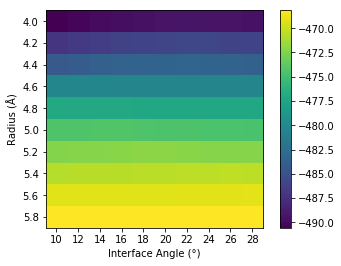

In [139]:
plt.imshow(results_array)
plt.ylabel('Radius (Å)')
plt.xlabel('Interface Angle (°)')
plt.yticks(range(len(radii)), ['{:.1f}'.format(x) for x in radii])
plt.xticks(range(len(interface_angles)), interface_angles)
plt.colorbar()

The model with a radius of 4.4 Å and interface angle of 18° is the best, let's have a look at the model.

In [141]:
best_dimer = build_dimer(4.0, 10)

In [142]:
budeff.get_internal_energy(best_dimer)

<BUFF Score -490.56: 0.00 St | -94.52 De | -396.03 Ch>

In [143]:
show_ball_and_stick(best_dimer)

NGLWidget()

If you zoom in on the asparagine residues in the core, you should see that they are now forming a nice hydrogen-bonding network. Neat!

> ### Problem
> Try performing a finer grid scan around the best parameters found by the last grid scan. Stick to at most 100 models or it might take a long time to finish.

When the parameter space that you want to explore is small, a grid scan is a good option. You can scale up the model building through parallelisation using the [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) module, based on your available resources. However, as you introduce more parameters, it quickly becomes very inefficient to perform a grid scan, and so other methods of parameter fitting are preferred (see Tutorial 3!).